In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
data=pd.read_csv('avocado.csv')

In [82]:
data.head()

,i,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [83]:
data.tail()

,i,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [84]:
avoc=data.drop(["i"],axis=1)
avoc.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [85]:
avoc.shape

(1517, 13)

In [86]:
avoc.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [87]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null int64
region          1517 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [88]:
avoc['Date'] = pd.to_datetime(avoc['Date'])

In [89]:
avoc['Month'] = avoc['Date'].dt.month
avoc['Day'] = avoc['Date'].dt.day

In [90]:
avoc.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


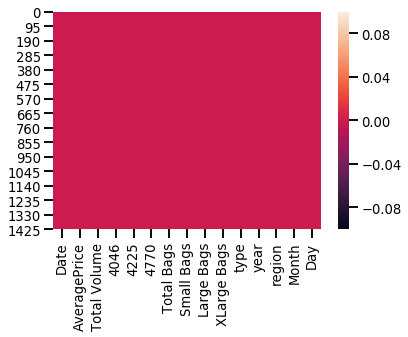

In [91]:
#To check missing value
sns.heatmap(avoc.isnull())

In [92]:
avoc.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [93]:
#To check duplicate values
avoc.duplicated().sum()

0

Summary Statistics

In [94]:
avoc.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,6.362558,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,3.472146,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,3.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,6.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,9.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,12.000000,31.000000


Check Correlation

In [95]:
avoc.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


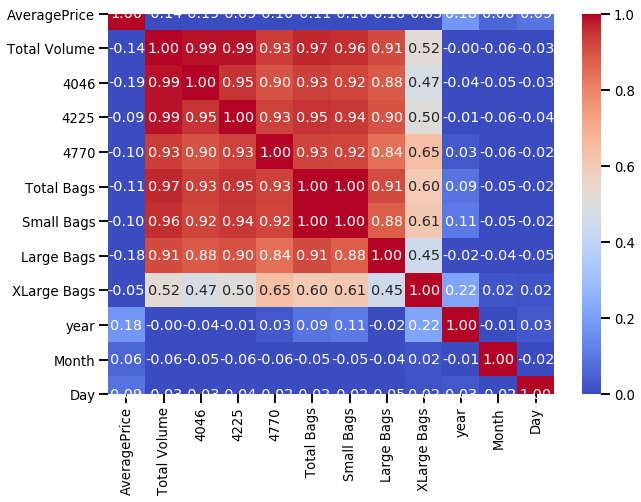

In [96]:
#showing the corelation with a heatmap
plt.figure(figsize=(10,7))
sns.set #(style='darkgrid')
sns.set_context('talk',font_scale=0.8)
sns.heatmap(avoc.corr(),annot=True,fmt='.2f',vmax=1,vmin=0,cmap='coolwarm')
plt.show()

Exploring Data Variables

In [97]:
avoc.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
Month             12
Day               31
dtype: int64

In [98]:
avoc.type.value_counts()

conventional    1517
Name: type, dtype: int64

In [99]:
avoc.region.value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

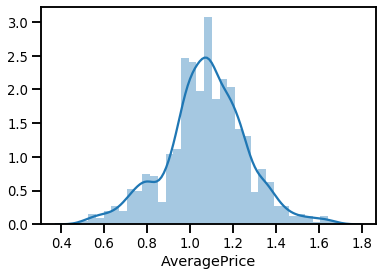

In [100]:
sns.distplot(avoc['AveragePrice'])

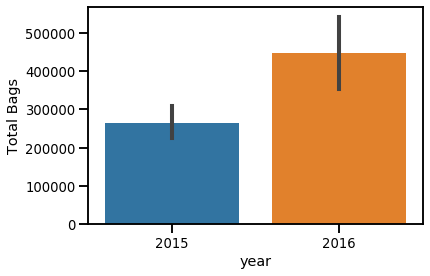

In [101]:
sns.barplot(x="year",y="Total Bags",data=avoc)

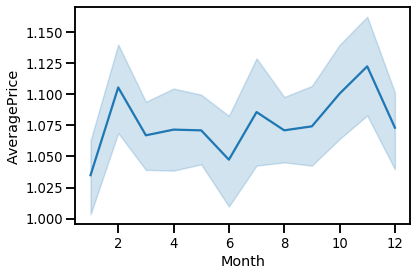

In [102]:
sns.lineplot(x="Month",y="AveragePrice",data=avoc)

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

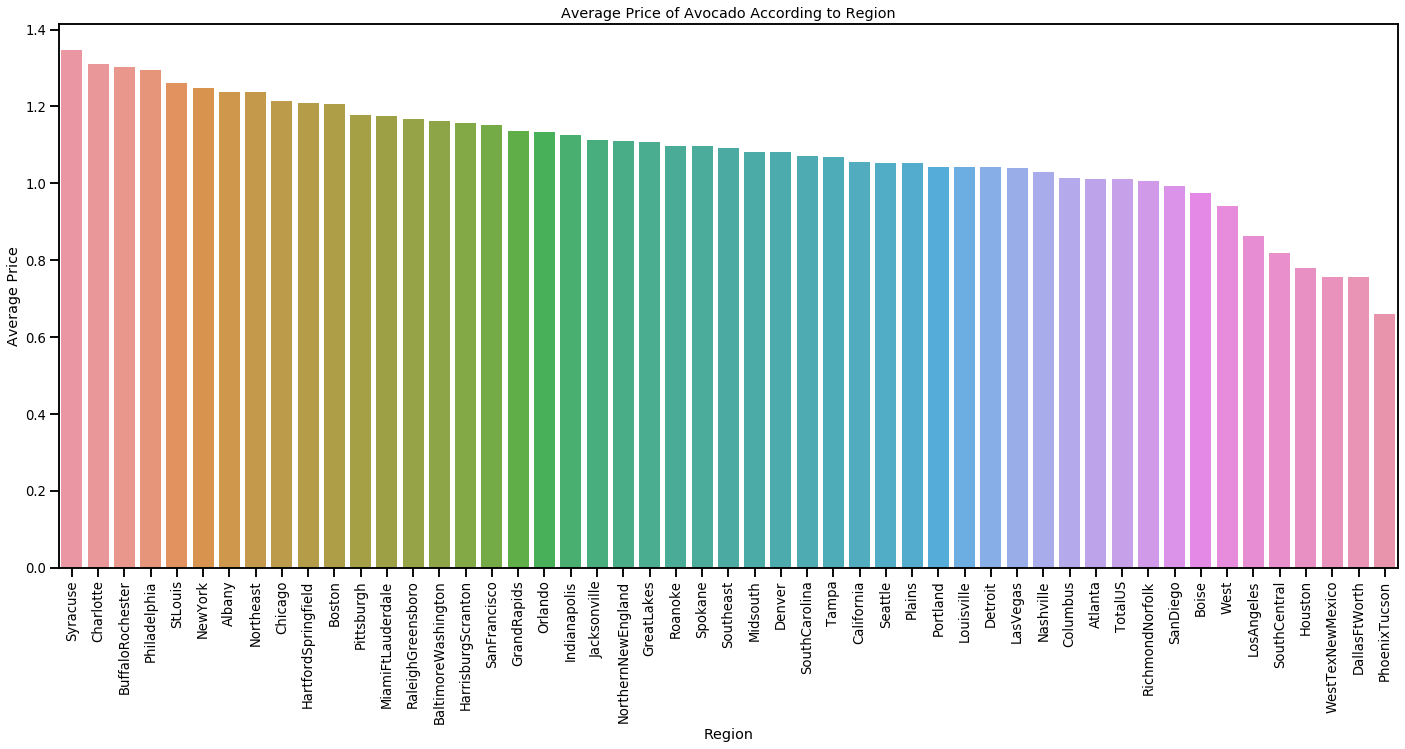

In [103]:
reg_list=list(avoc.region.unique())
avg_price=[]

for i in reg_list:
    x=avoc[avoc.region==i]
    reg_avg=sum(x.AveragePrice)/len(x)
    avg_price.append(reg_avg)

avoc1=pd.DataFrame({'reg_list':reg_list,'avg_price':avg_price})
new_index=avoc1.avg_price.sort_values(ascending=False).index.values
sorted_data=avoc1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.reg_list,y=sorted_data.avg_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5, 1.0, 'Average of Total Volume According to Region')

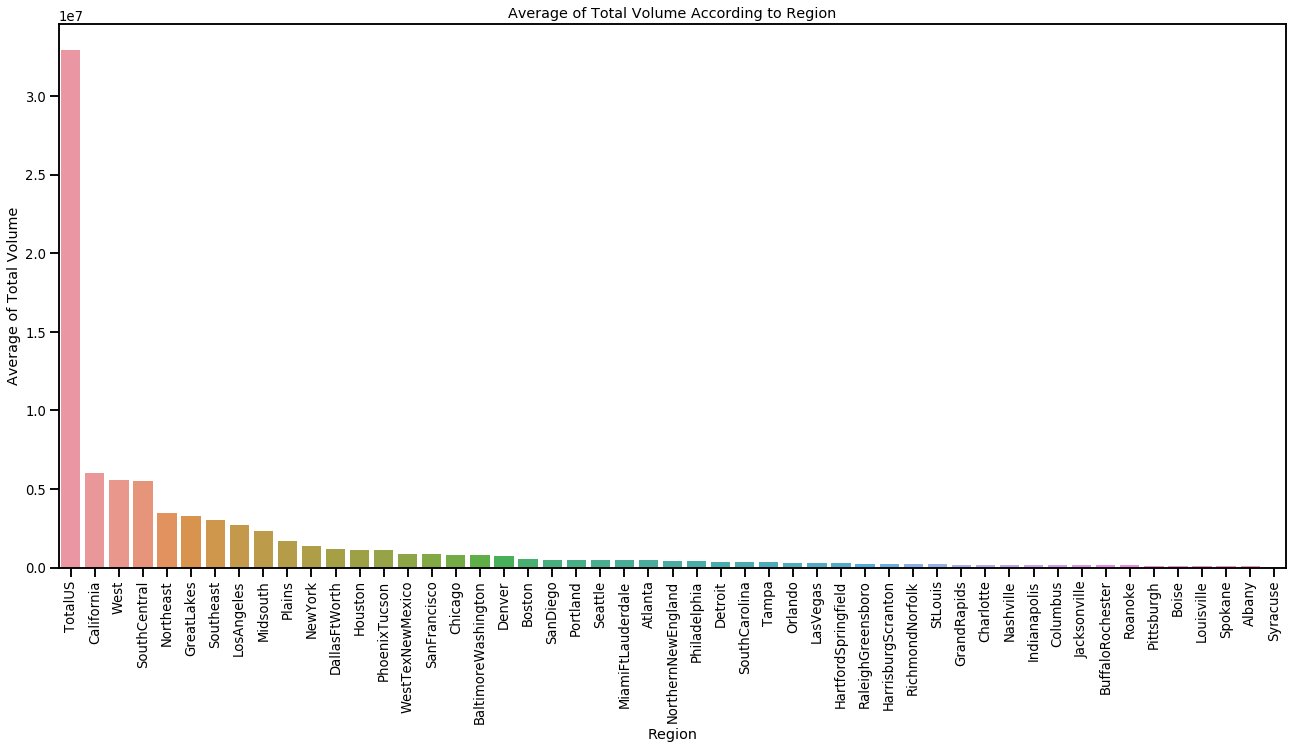

In [104]:
fit=avoc.region!='Total_Use'
avoc1=avoc[fit]

reg_list=list(avoc1.region.unique())
avg_total_vol=[]

for i in reg_list:
    x=avoc1[avoc1.region==i]
    avg_total_vol.append(sum(x['Total Volume'])/len(x))
avoc3=pd.DataFrame({'reg_list':reg_list,'avg_total_vol':avg_total_vol})

new_index=avoc3.avg_total_vol.sort_values(ascending=False).index.values
sorted_data1=avoc3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.reg_list,y=sorted_data1.avg_total_vol)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

In [105]:
avoc=avoc.drop(['Date'],axis=1)

Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [107]:
avoc['region'] = labelquality.fit_transform(avoc['region'])
avoc['type'] = labelquality.fit_transform(avoc['type'])

In [108]:
avoc.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20


Ploting Outliers

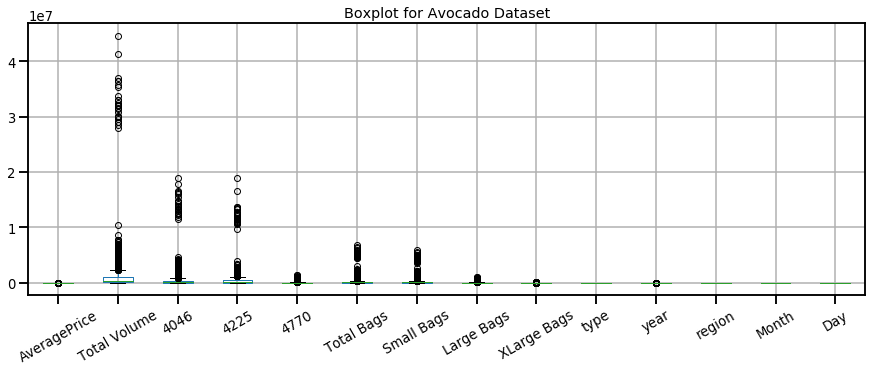

In [109]:
avoc.plot(kind='box',grid=True,title="Boxplot for Avocado Dataset",legend=True,rot=30,figsize=(15,5))

In [110]:
avoc.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20


In [78]:
#check for Outlier
#from scipy.stats import zscore
#z_score=abs(zscore(avoc))
#avoc=avoc.loc[(z_score < 3).all(axis=1)]

In [112]:
avoc.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [113]:
#for skewness
for col in avoc.columns:
    if avoc.skew().loc[col] > 0.55:
        avoc[col]=np.log1p(avoc[col])

In [115]:
avoc.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
type            0.000000
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [116]:
avoc.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,7.608871,0,12,27
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,7.608871,0,12,20


Classification for Region

In [117]:
#Features and Target Value
x=avoc.drop(['region','year','Month','Day'],axis=1)
y=avoc['region']

In [118]:
x.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0


In [119]:
y.head(2)

0    0
1    0
Name: region, dtype: int32

In [120]:
#Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [121]:
x=sc.fit_transform(x)
x

array([[ 1.35048079, -1.35676174, -1.82816171, ..., -0.96674301,
        -0.81077519,  0.        ],
       [ 1.45639674, -1.46638736, -2.01206913, ..., -0.95386092,
        -0.81077519,  0.        ],
       [-0.76783831, -0.9321394 , -1.94183376, ..., -0.93753117,
        -0.81077519,  0.        ],
       ...,
       [ 2.14485045, -0.64565294, -0.20190426, ...,  0.34275114,
         1.10389091,  0.        ],
       [ 2.09189247, -0.60503087, -0.13577946, ...,  0.34346272,
        -0.81077519,  0.        ],
       [ 1.88006056, -0.62805557, -0.23299293, ...,  0.44343485,
        -0.81077519,  0.        ]])

In [122]:
#Spilt Train and Test
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [144]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    print()
    print('prediction: ',pred)
    return random_state

In [138]:
#KNN

In [132]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 1}

In [145]:
kn=KNeighborsClassifier(n_neighbors=1)
knn=rst(kn,x,y)

random_state for mod  is  68 which gives accuracy score of:  0.9758771929824561
confusion matrix:  [[22  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  4]]
classification report:                precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.92      0.86      0.89        14
           2       0.96      1.00      0.98        25
           3       0.96      1.00      0.98        24
           4       1.00      0.95      0.98        22
           5       1.00      0.92      0.96        12
           6       1.00      1.00      1.00        21
           7       1.00      0.89      0.94         9
           8       0.78      1.00      0.88         7
           9       0.94      1.00      0.97        17
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         9
          12      

In [146]:
#Cross Validation
accuracy_score_1=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.9469415174566725

In [147]:
#Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [149]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=9)
dtc=rst(dt,x,y)

random_state for mod  is  136 which gives accuracy score of:  0.918859649122807
confusion matrix:  [[22  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  4]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       1.00      0.79      0.88        14
           2       0.92      0.96      0.94        25
           3       1.00      0.96      0.98        24
           4       0.92      1.00      0.96        22
           5       0.90      0.75      0.82        12
           6       0.91      1.00      0.95        21
           7       0.89      0.89      0.89         9
           8       1.00      0.71      0.83         7
           9       0.89      1.00      0.94        17
          10       0.50      0.75      0.60         4
          11       0.90      1.00      0.95         9
          12      

In [150]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.8534014296420173

In [151]:
#GaussianNB

In [152]:
nb=GaussianNB()
gnb=rst(nb,x,y)

random_state for mod  is  60 which gives accuracy score of:  0.9342105263157895
confusion matrix:  [[23  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  4]]
classification report:                precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.75      0.86      0.80        14
           2       1.00      1.00      1.00        25
           3       0.96      0.96      0.96        24
           4       1.00      0.82      0.90        22
           5       1.00      0.92      0.96        12
           6       0.84      1.00      0.91        21
           7       1.00      0.56      0.71         9
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        17
          10       0.75      0.75      0.75         4
          11       1.00      1.00      1.00         9
          12      

In [153]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_4

0.9006057214692043

In [154]:
#SVC

In [155]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

{'degree': 3, 'kernel': 'linear'}

In [157]:
sv=SVC(kernel='linear',degree=3)
svc=rst(sv,x,y)

random_state for mod  is  31 which gives accuracy score of:  0.9758771929824561
confusion matrix:  [[23  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 25 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0  4]]
classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.74      1.00      0.85        14
           2       1.00      1.00      1.00        25
           3       0.96      1.00      0.98        24
           4       0.96      1.00      0.98        22
           5       0.92      1.00      0.96        12
           6       1.00      1.00      1.00        21
           7       0.80      0.89      0.84         9
           8       1.00      1.00      1.00         7
           9       0.94      1.00      0.97        17
          10       0.50      0.75      0.60         4
          11       1.00      1.00      1.00         9
          12      

In [158]:
#Cross Validation
accuracy_score_5=cross_val_score(sv,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.9418314436885797

In [181]:
import joblib
joblib.dump(knn,"KNN Classification for Avocado Dataset.pkl")

['KNN Classification for Avocado Dataset.pkl']

Regression for Average Price

In [160]:
#Features and Target Value
x=avoc.drop(['AveragePrice','year','Month','Day'],axis=1)
y=avoc['AveragePrice']

In [162]:
x.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0


In [163]:
y.head(2)

0    1.33
1    1.35
Name: AveragePrice, dtype: float64

In [165]:
#Standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [166]:
x=sc.fit_transform(x)
x

array([[-1.35676174, -1.82816171, -0.56752404, ..., -0.81077519,
         0.        , -1.3143384 ],
       [-1.46638736, -2.01206913, -0.68423257, ..., -0.81077519,
         0.        , -1.3143384 ],
       [-0.9321394 , -1.94183376, -0.15924137, ..., -0.81077519,
         0.        , -1.3143384 ],
       ...,
       [-0.64565294, -0.20190426, -0.58460671, ...,  1.10389091,
         0.        , -0.88028586],
       [-0.60503087, -0.13577946, -0.57688492, ..., -0.81077519,
         0.        , -0.88028586],
       [-0.62805557, -0.23299293, -0.5703497 , ..., -0.81077519,
         0.        , -0.88028586]])

In [167]:
#Spilt Train and Test
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [168]:
def mod(model,x,y):
    max_r=0
    for i in range(30,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        r2score=r2_score(y_test,pred)
        MAE= mean_absolute_error(y_test,pred)
        MSE= mean_squared_error(y_test,pred)
        RMSE=np.sqrt(MSE)
        
        if r2score > max_r:
            max_r=r2score
            random_state=i
            
    print('the random state at ', mod,'\nis: ',random_state, 
          '\nand it produces \n r2 score of ',r2score,
          '\n mean abs error value of ', MAE,
          '\n mean squared error value of',MSE,
          '\n & root mean sq error ', RMSE)
    print()
    print('prediction: ',pred)
    return random_state

In [169]:
#LinearRegression
lr=LinearRegression()
mod(lr,x,y)

the random state at  <function mod at 0x0000003F4C1EA3A8> 
is:  139 
and it produces 
 r2 score of  0.34496294361689595 
 mean abs error value of  0.11435130851027103 
 mean squared error value of 0.02296699737530379 
 & root mean sq error  0.15154866339002726

prediction:  [1.16677156 1.16070015 0.95696209 1.03315631 1.1243438  1.24305728
 1.04668878 1.17372048 1.02542536 0.86504111 1.11952381 1.0521426
 1.06973414 0.92770839 1.27957005 1.08378549 0.89275267 1.08757133
 0.94175925 1.09416845 1.05481868 1.19771637 0.99888474 1.02333082
 0.93697266 1.0434073  1.12229082 0.97229725 1.17408248 1.16063107
 1.10547433 1.0399346  1.25324264 1.12882522 0.90056863 0.79595803
 1.07523019 1.28990305 1.31990423 1.25060033 1.080345   1.10204522
 0.95407024 1.06441206 1.15546423 1.16896583 1.05824321 1.23207885
 0.91784288 1.16881276 1.05966068 0.96365206 1.14307864 1.06975441
 0.91717548 1.07322144 0.98820889 1.34151374 0.99969172 0.94907893
 1.04918806 1.24104773 1.20371869 1.28276174 1.31717738 

139

In [170]:
#cross validation
lr_scr=cross_val_score(lr,x,y,cv=5,scoring='r2')
print('the r2 score at liner regression model is=', lr_scr.mean())

the r2 score at liner regression model is= 0.14711724477151403


In [171]:
#Decision Tree Regressor
dtr=DecisionTreeRegressor()
dtr_para={'criterion':['mse','friedman_mse', 'mae'],'max_depth':[3,4,5]}
dtr_grid=GridSearchCV(dtr,dtr_para,cv=5)
dtr_grid.fit(x,y)
dtr_grid.best_params_

{'criterion': 'mae', 'max_depth': 3}

In [172]:
dtr=DecisionTreeRegressor(criterion='mae',max_depth=3)
mod(dtr,x,y)

the random state at  <function mod at 0x0000003F4C1EA3A8> 
is:  47 
and it produces 
 r2 score of  0.3473506723652663 
 mean abs error value of  0.10882675438596491 
 mean squared error value of 0.02288327850877193 
 & root mean sq error  0.15127220005265982

prediction:  [1.07  1.16  0.765 1.005 1.16  1.16  1.07  1.16  1.16  1.005 1.16  0.95
 1.16  1.005 1.16  1.07  0.765 1.07  1.005 0.95  1.09  1.365 1.07  1.365
 1.07  1.16  1.16  0.765 1.195 1.16  1.09  1.07  1.07  1.07  1.09  0.765
 1.16  1.195 1.365 1.16  1.07  1.07  1.005 0.95  1.16  1.16  1.16  1.07
 0.765 1.07  1.07  1.07  1.16  1.09  1.09  1.09  1.16  1.16  1.16  1.07
 1.07  1.07  1.16  1.365 1.365 1.365 1.005 1.07  1.16  1.07  1.16  0.765
 1.16  1.005 1.16  1.07  1.16  1.16  1.07  1.16  1.16  1.16  1.005 0.95
 1.16  0.95  0.765 1.07  1.07  1.005 1.16  1.16  1.16  1.16  1.07  1.16
 1.07  1.07  1.195 1.07  1.365 0.765 1.16  0.765 1.09  1.365 1.16  1.07
 1.16  1.16  1.16  1.07  1.16  1.07  1.07  1.16  1.07  1.07  1.09  1.16
 1.0

47

In [173]:
#Cross Validation
dtr_scr=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print('the r2 score at DTR model is=', dtr_scr.mean())

the r2 score at DTR model is= 0.06971467714780563


In [174]:
#KNeighbors Regressor
knr=KNeighborsRegressor()
k_para={'n_neighbors': range(4,20),'algorithm':['ball_tree', 'kd_tree', 'brute']}
k_grid=GridSearchCV(knr,k_para,cv=5)
k_grid.fit(x,y)
k_grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 19}

In [175]:
knr=KNeighborsRegressor(algorithm='ball_tree',n_neighbors=19)
mod(knr,x,y)

the random state at  <function mod at 0x0000003F4C1EA3A8> 
is:  123 
and it produces 
 r2 score of  0.5709253428963236 
 mean abs error value of  0.09017890120036934 
 mean squared error value of 0.015044273339165087 
 & root mean sq error  0.12265509911603792

prediction:  [1.15052632 1.16526316 1.11105263 1.05947368 1.13684211 1.21789474
 1.2        1.15894737 1.11052632 1.04526316 1.16789474 1.02631579
 1.21       0.99631579 1.16894737 1.00684211 0.90894737 0.97210526
 1.02736842 0.92263158 1.00578947 1.16526316 1.1        1.20157895
 1.06052632 1.18315789 1.21052632 0.74526316 1.17631579 1.17263158
 1.14578947 1.12842105 1.14947368 1.05736842 0.89421053 0.65315789
 0.76631579 1.17842105 1.31473684 1.17       1.10578947 0.97263158
 0.99105263 0.98842105 1.09736842 1.2        1.01       1.22947368
 0.89842105 1.14736842 1.13526316 1.11789474 1.17368421 1.10263158
 0.9        1.04315789 1.06736842 1.25894737 1.04052632 1.09
 1.04263158 1.20526316 1.11263158 1.27157895 1.31526316 1.174

123

In [176]:
#Cross Validation
knr_scr=cross_val_score(knr,x,y,cv=5,scoring='r2')
print('the r2 score at KNR model is=', knr_scr.mean())

the r2 score at KNR model is= 0.0092769574044979


In [177]:
#SVR
svr=SVR()
svr_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svr_grid=GridSearchCV(svr,svr_para,cv=5)
svr_grid.fit(x,y)
svr_grid.best_params_

{'gamma': 0.01, 'kernel': 'rbf'}

In [178]:
svr=SVR(kernel='rbf',gamma=0.01)
mod(svr,x,y)

the random state at  <function mod at 0x0000003F4C1EA3A8> 
is:  139 
and it produces 
 r2 score of  0.41418330124643765 
 mean abs error value of  0.10502744184095504 
 mean squared error value of 0.0205399838857563 
 & root mean sq error  0.1433177724002027

prediction:  [1.1714777  1.13936273 0.92090079 1.0409207  1.17250212 1.23267699
 1.13317159 1.13686345 1.08179545 0.94920539 1.12201406 1.03294959
 1.12972769 0.88302122 1.20632656 1.04934581 0.86959952 1.07589999
 0.96884995 1.09662081 1.06273684 1.20585978 1.0806154  1.08101883
 1.05822756 1.0773822  1.17671261 0.91181    1.18946126 1.17894677
 1.09256483 1.09108323 1.23297904 1.08250712 0.89999327 0.77390653
 1.02889978 1.24983052 1.33027169 1.19847147 1.11891758 1.12155591
 0.90263045 1.07843998 1.11977891 1.18110623 1.02476967 1.21653091
 0.8878726  1.16537951 1.12012853 1.08722723 1.21371937 1.06155945
 0.89477023 1.08641469 0.99796275 1.28964152 1.02878769 1.03464995
 1.08056711 1.21402322 1.15613403 1.35912878 1.27388448 1

139

In [183]:
#Cross Validation
svr_scr=cross_val_score(svr,x,y,cv=5,scoring='r2')
print('the r2 score at SVR model is=', svr_scr.mean())

the r2 score at SVR model is= 0.20939018492093542


In [179]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
mod(ada,x,y)

the random state at  <function mod at 0x0000003F4C1EA3A8> 
is:  85 
and it produces 
 r2 score of  0.5475168306541922 
 mean abs error value of  0.09999888752113921 
 mean squared error value of 0.015865025743912037 
 & root mean sq error  0.1259564438363994

prediction:  [1.16019646 1.15977273 0.9973301  1.10261905 1.23631387 1.23631387
 1.09713018 1.15977273 1.12006369 1.10261905 1.16814516 1.03618421
 1.16814516 0.97923977 1.13159696 1.12006369 0.89703125 1.13
 1.03574713 0.93111111 1.03214286 1.15977273 1.1113871  1.12230769
 1.08492063 1.15977273 1.16814516 0.87543353 1.15188285 1.13866359
 1.13866359 1.09260101 1.12348837 1.13159696 0.94641509 0.73142857
 1.02325    1.36234136 1.20121951 1.16814516 1.1113871  1.0225
 1.00102564 1.01454545 1.14767123 1.20121951 1.03574713 1.23631387
 0.93111111 1.09428571 1.09260101 1.08553571 1.23631387 1.06761905
 0.88442424 1.03618421 1.01363636 1.23336676 1.09491525 1.05428571
 1.1113871  1.35416076 1.15188285 0.73846154 1.33542857 1.20121951


85

In [180]:
#Cross Validation
ada_scr=cross_val_score(ada,x,y,cv=5,scoring='r2')
print('the r2 score at AdaBoost Reg model is=', ada_scr.mean())

the r2 score at AdaBoost Reg model is= 0.16773099352977047


In [184]:
import joblib
joblib.dump(lr,"LR for Avocado Dataset.pkl")

['LR for Avocado Dataset.pkl']